**Model Creaton and Predictions**


Epoch 0
Updated Weights (W1):
[[0.37439252 0.94893062]
 [0.7318638  0.59647194]]
Updated Biases (b1):
[[0.15577624 0.15266825]]
Updated Weights (W2):
[[0.0451749 ]
 [0.85224737]]
Updated Biases (b2):
[[0.58221377]]
Actual Output:
[[1 0 0 1]]
Predicted Output:
[[0.7501134  0.7740691  0.78391515 0.79889097]]

Epoch 1000
Updated Weights (W1):
[[0.83245482 0.75247276]
 [1.02438503 0.3026181 ]]
Updated Biases (b1):
[[ 0.27651394 -0.0153697 ]]
Updated Weights (W2):
[[-0.63484931]
 [ 0.34054377]]
Updated Biases (b2):
[[0.2495493]]
Actual Output:
[[1 0 0 1]]
Predicted Output:
[[0.51433656 0.48629749 0.50063783 0.48341045]]

Epoch 2000
Updated Weights (W1):
[[1.97390343 0.75115305]
 [1.99281026 0.21125785]]
Updated Biases (b1):
[[ 0.08358405 -0.06512518]]
Updated Weights (W2):
[[-1.66558313]
 [ 0.78190937]]
Updated Biases (b2):
[[0.85083892]]
Actual Output:
[[1 0 0 1]]
Predicted Output:
[[0.58924747 0.4478432  0.47358029 0.44262527]]

Epoch 3000
Updated Weights (W1):
[[3.63487835 1.1322863 ]
 

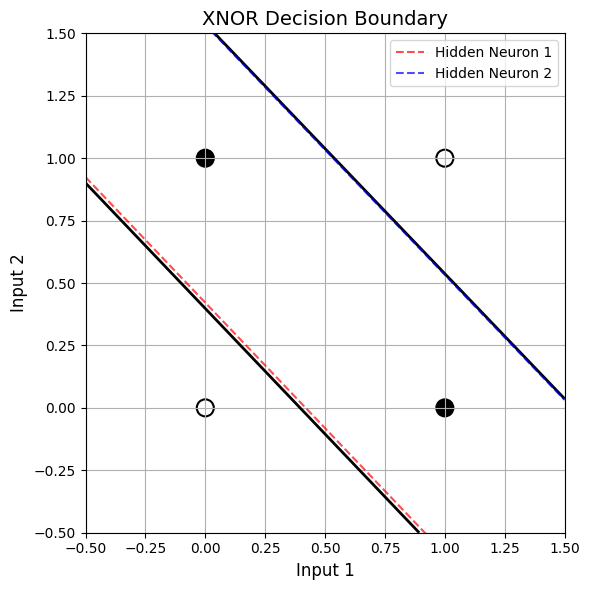

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XNOR truth table
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[1],
              [0],
              [0],
              [1]])

# Initialize weights and biases
np.random.seed(42)
input_size = 2
hidden_size = 2
output_size = 1

# Weights and biases
W1 = np.random.uniform(size=(input_size, hidden_size))
b1 = np.random.uniform(size=(1, hidden_size))
W2 = np.random.uniform(size=(hidden_size, output_size))
b2 = np.random.uniform(size=(1, output_size))

# Training parameters
learning_rate = 0.1
epochs = 10000

# Training the MLP
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, W1) + b1
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, W2) + b2
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = y - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(W2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    W2 += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    b2 += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(d_hidden_layer) * learning_rate
    b1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Print progress every 1000 epochs
    if epoch % 1000 == 0:
        print(f"\nEpoch {epoch}")
        print("Updated Weights (W1):")
        print(W1)
        print("Updated Biases (b1):")
        print(b1)
        print("Updated Weights (W2):")
        print(W2)
        print("Updated Biases (b2):")
        print(b2)
        print("Actual Output:")
        print(y.T)
        print("Predicted Output:")
        print(predicted_output.T)

# Final predictions
hidden_layer_input = np.dot(X, W1) + b1
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, W2) + b2
predicted_output = sigmoid(output_layer_input)

print("\n📌 Final Results:")
print(f"{'Input 1':^10} {'Input 2':^10} {'Actual':^10} {'Predicted':^10}")
print("-" * 40)
for i in range(len(X)):
    print(f"{X[i][0]:^10} {X[i][1]:^10} {y[i][0]:^10} {predicted_output[i][0]:^10.4f}")

# Decision Boundary Visualization with clean style
def plot_decision_boundary(X, y, W1, b1, W2, b2):
    # Create mesh grid
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300),
                         np.linspace(-0.5, 1.5, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Forward pass on mesh
    hidden_layer = sigmoid(np.dot(grid, W1) + b1)
    preds = sigmoid(np.dot(hidden_layer, W2) + b2)
    preds = preds.reshape(xx.shape)

    # Plot settings
    plt.figure(figsize=(6, 6))

    # Decision boundary at 0.5 level
    plt.contour(xx, yy, preds, levels=[0.5], colors='black', linewidths=2)

    # Plot input points with white fill and black edges
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='gray',
                edgecolors='black', s=150, linewidths=1.5)

    # Add the two decision boundary lines
    x_vals = np.linspace(-0.5, 1.5, 100)

    # Line 1: First hidden neuron's decision boundary
    y1 = (-W1[0, 0] * x_vals - b1[0, 0]) / W1[1, 0]
    plt.plot(x_vals, y1, 'r--', linewidth=1.5, alpha=0.7, label='Hidden Neuron 1')

    # Line 2: Second hidden neuron's decision boundary
    y2 = (-W1[0, 1] * x_vals - b1[0, 1]) / W1[1, 1]
    plt.plot(x_vals, y2, 'b--', linewidth=1.5, alpha=0.7, label='Hidden Neuron 2')

    # Plot settings
    plt.title("XNOR Decision Boundary", fontsize=14)
    plt.xlabel("Input 1", fontsize=12)
    plt.ylabel("Input 2", fontsize=12)
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_decision_boundary(X, y, W1, b1, W2, b2)